### This dataset contains the result of an A/B test where two groups, the control group and the treatment group, were exposed to an old webpage and a new webpage respectively. The purpose of this test was to determine if the new webpage resulted in a significant increase in conversions compared to the old webpage. Each row represents a unique user and shows whether they’re in the control or treatment group and whether they converted or not.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [5]:
df = pd.read_csv('ab_data.csv')

In [6]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [16]:
df_cleaned = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | 
(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

In [17]:
df_cleaned.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


# Removing the duplicates

In [20]:
df_cleaned['user_id'].duplicated().sum()

1

In [24]:
df_cleaned[df_cleaned.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [27]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### We have two duplicates from user_id 773192, assuming that we are considering the first entry

In [30]:
df_cleaned = df.drop_duplicates(subset='user_id', keep="first")

# Plotting the graphs

<AxesSubplot:xlabel='group,landing_page,converted'>

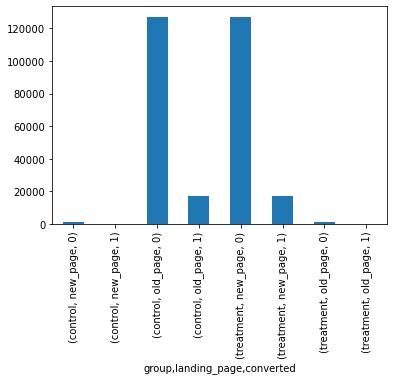

In [33]:
groups = df_cleaned.groupby(['group','landing_page','converted']).size()
groups.plot.bar()

### Proportions of both old page and new page is the same.

<AxesSubplot:ylabel='landing_page'>

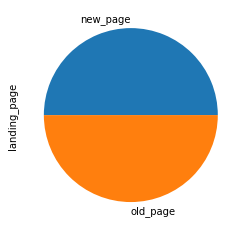

In [35]:
df_cleaned['landing_page'].value_counts().plot.pie()

#### We would be performing Chi-square testing as we want to test if there is any relationship with the two categorical variables.
#### H0 = No relationship between both the variables.
#### H1(alternative hypothesis) - The variables are dependent on each other

In [37]:
a = df_cleaned[df_cleaned['group'] == 'control']
b = df_cleaned[df_cleaned['group'] == 'treatment']
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

In [38]:
import scipy
from scipy import stats
print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.22689933216132585


#### p-value is approx 22% and assuming that 5% of level of significance. We can't reject the null hypothesis which means there is no significance between the conversion rates of old page and new page.

In [39]:
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.12029717968491792 0.11884253398646046


#### Sanity test is just to confirm the chi-testing, conversion rates of both the groups has been calculated and the  difference is minimal